In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, dirname, isfile, basename
from os import getcwd, listdir

In [2]:
model_path = join(join(dirname(getcwd()), 'modelling'), 'models')
data_path = join(dirname(getcwd()), 'data')
data_path = join(data_path, 'completion.csv')

In [3]:
data = pd.read_csv(data_path)

In [4]:
min_easting = min(data.easting)
max_easting = max(data.easting)
min_northing = min(data.northing)
max_northing = max(data.northing)

In [5]:
print((max_easting-min_easting) * (max_northing-min_northing))
print((max_easting-min_easting))
print((max_northing-min_northing))

9306324300.0
94289.0
98700.0


In [6]:
# Increasing step size decreases fidelity of graphs
# good default is 100
step_size = 100
scale = (max_easting - min_easting) / (max_northing - min_northing)

In [7]:
x = np.arange(start=min_easting, stop=max_easting, step=step_size)
y = np.arange(start=min_northing, stop=max_northing, step=step_size / scale)
l = []
for i in range(len(x)):
    for j in range(len(y)):
        l.append([x[i], y[j]])
locations = np.array(l)

In [8]:
from joblib import load

In [44]:
model_paths = [join(model_path, f) for f in listdir(model_path) if isfile(join(model_path, f))]
if join(model_path, '.DS_Store') in model_paths:
    model_paths.remove(join(model_path, '.DS_Store')) 
    
models = [load(x) for x in model_paths]
results = []
columns = ['easting', 'northing']

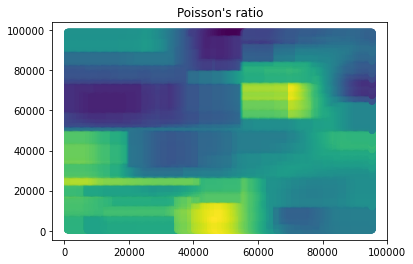

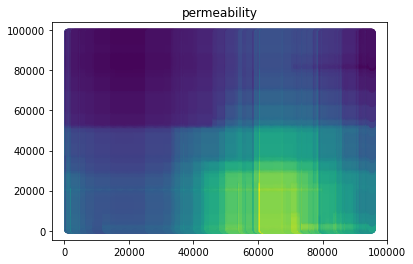

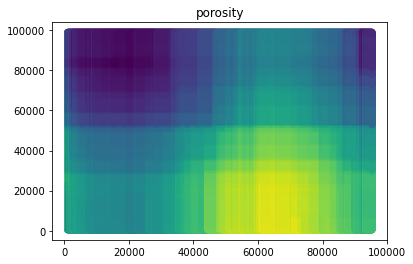

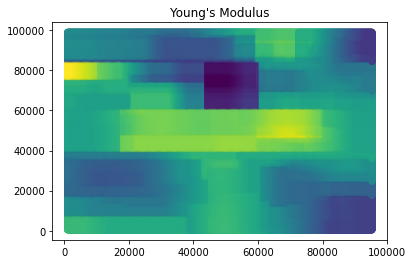

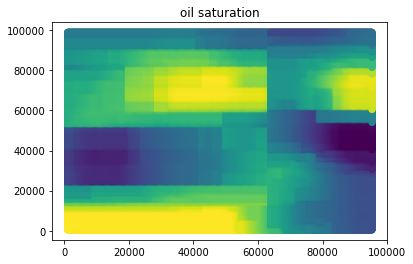

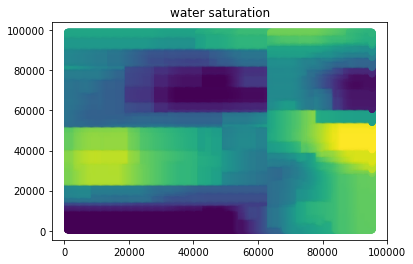

In [45]:
for model in models:
    name = basename(model_paths[models.index(model)].replace('.model', ''))
    image_name = join('maps', name + ".jpg")
    data_name = join('data', name+'.csv')
    plt.figure()
    colors = model.predict(locations)
    results.append(colors)
    t = np.zeros((locations.shape[0], locations.shape[1]+1))
    t[:,:-1] = locations
    t[:,-1] = colors
    np.savetxt(data_name, t, delimiter=',')
    plt.scatter(locations[:,0], locations[:,1], c= colors)
    plt.title(name)
    columns.append(name)
    plt.savefig(image_name)

In [46]:
all_data = np.zeros((locations.shape[0], locations.shape[1]+len(results)))
all_data[:,:2] = locations
all_data[:,2:] = np.array(results).T

In [50]:
df = pd.DataFrame(data=all_data, columns=columns)

In [52]:
df.to_csv('all_data.csv')